# Pemodelan Covid-19 sebagai sistem dinamik

In [65]:
using DifferentialEquations
using Plots


Dalam model SEIR, sebuah populasi dengan $N$ orang dibagi menjadi empat himpunan yang terpisah
1. $S$(susceptible) yang merupakan jumlah bagian dari populasi yang belum terkena virus.
2. $E$ (exposed) yang merupakan jumlah bagian dari populasi yang tertular virus
3. $I$ (infectious) yang merupakan jumlah bagian dari populasi yang menularkan virus
4. $R$ (recovered) yang merupakan jumlah bagian dari populasi yang sembung dari penyakit atau meninggal. Bagian ini tidak bisa lagi masuk menjadi bagian $S$

Kemudian, kita mendefinisikan peubah-pubah berikut ini:
\begin{align}
s = \frac{S}{N} \qquad
e = \frac{E}{N} \qquad
i = \frac{I}{N} \qquad
r = \frac{R}{N}
\end{align} 
sehingga $s + e + i + r = 1$.

Kita dapat memodelkan populasi tersebut dengan sistem persamaan berikut ini

\begin{align*}
\frac{ds}{dt} & = -(1-u)\beta s i \\
\frac{de}{dt} & = (1-u)\beta s i - \alpha e \\
\frac{di}{dt} & = \alpha e  - \gamma i \\
\frac{dr}{dt} & = \gamma i
\end{align*}  

dimana 
1. $\alpha,\beta,\gamma$ adalah parameter yang satuannya adalah invers terhadap waktu.
2. $\beta$ adalah kecepatan transmisi virus COVID-19.
3. $\alpha$ adalah kecepatan seseorang berubah dari E (terkena virus) ke I (menyebarkan virus) atau kecepatan inkubasi. Jika waktu inkubasi adalah $\tau_{incub}$, maka $\alpha = \frac{1}{\tau_{incub}} $
4. $ \gamma$ adalah kecepatan sembuh.

In [66]:
function covid!(du,u,p,t)
    α,β,γ,k=p
    du[1]=-(1-k)*β*u[1]*u[3]
    du[2]=(1-k)*β*u[1]*u[3] -α*u[2]
    du[3]=α*u[2]-γ*u[3]
    du[4]==γ*u[3]
end


covid! (generic function with 1 method)

In [73]:
u0 = [1000.0;1.0;1.0;1.0]
tspan = (0.0,50.0)
p=(0.01,0.05,0.01,0.03)
prob = ODEProblem(covid!,u0,tspan,p)
sol = solve(prob)

retcode: Success
Interpolation: Automatic order switching interpolation
t: 129-element Array{Float64,1}:
  0.0
  0.041255901916200675
  0.2113907152979412
  0.524074561319203
  0.9476396664346027
  1.4953953515348881
  2.172741821477489
  2.977694670640052
  3.898810551417879
  4.9190177005308025
  6.066365107666727
  7.254521263749407
  7.859548391496814
  ⋮
 47.30039703679589
 47.55768342070054
 47.814108330709416
 48.06968635879712
 48.32443171957492
 48.578358322940055
 48.83147967840348
 49.08380900074889
 49.335359181127394
 49.58614279165106
 49.83617212287356
 50.0
u: 129-element Array{Array{Float64,1},1}:
 [1000.0, 1.0, 1.0, 1.0]
 [998.000814745105, 2.998360337531084, 1.0004123016333173, 1.0]
 [989.7633734602134, 11.223703695654205, 1.0108013222496977, 1.0]
 [974.354145460751, 26.57397864540675, 1.0665191015884852, 1.0]
 [951.8834801671735, 48.88569030399313, 1.2206619729180552, 1.0]
 [917.6116403528703, 82.80017111798782, 1.5704604836620257, 1.0]
 [862.0322489202913, 137.6427

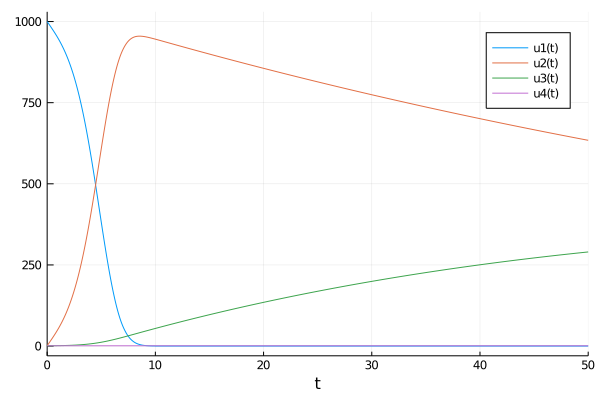

In [74]:
plot(sol,vars=(0,1))
plot!(sol,vars=(0,2))
plot!(sol,vars=(0,3))
plot!(sol,vars=(0,4))